# Water Quality Prediction by using Machine Learning 

# Package Importing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Dataset Reading

In [5]:
import pandas as pd

# Load the dataset from an Excel file
Input_Data = pd.read_csv("C:\\Users\\Rutuja\\OneDrive\\Documents\\TY_Instru\\AI_ML\\AI_ML_CP\\water_potability_final.csv")
Input_Data


,PH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Datasets Pre-Processing

In [6]:
Input_Data.head()

,PH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
Input_Data.tail()

,PH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [8]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PH               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   TDS              3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
Input_Data.describe()

,PH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
Input_Data.value_counts('Potability')

Potability
0    1998
1    1278
Name: count, dtype: int64

In [11]:
Input_Data.isna().sum()

PH                 491
Hardness             0
TDS                  0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:

# Check for null values
print("Number of null values in each column:")
print(Input_Data.isnull().sum())

# Option 1: Fill null values with mean (for numerical columns)
Input_Data['PH'].fillna(Input_Data['PH'].mean(), inplace=True)
Input_Data['Hardness'].fillna(Input_Data['Hardness'].mean(), inplace=True)
Input_Data['TDS'].fillna(Input_Data['TDS'].mean(), inplace=True)
Input_Data['Chloramines'].fillna(Input_Data['Chloramines'].mean(), inplace=True)
Input_Data['Sulfate'].fillna(Input_Data['Sulfate'].mean(), inplace=True)
Input_Data['Conductivity'].fillna(Input_Data['Conductivity'].mean(), inplace=True)
Input_Data['Organic_carbon'].fillna(Input_Data['Organic_carbon'].mean(), inplace=True)
Input_Data['Trihalomethanes'].fillna(Input_Data['Trihalomethanes'].mean(), inplace=True)
Input_Data['Turbidity'].fillna(Input_Data['Turbidity'].mean(), inplace=True)
# Verify if there are no nulls left
print("Number of null values after handling:")
print(Input_Data.isnull().sum())

Number of null values in each column:
PH                 491
Hardness             0
TDS                  0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Number of null values after handling:
PH                 0
Hardness           0
TDS                0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Data Visualiation : Explorartory Data Analysis

<Axes: >

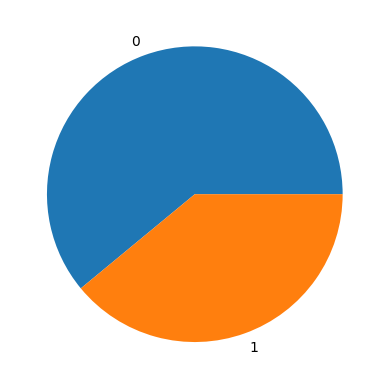

In [13]:
Input_Data.groupby('Potability').size().plot(kind='pie')

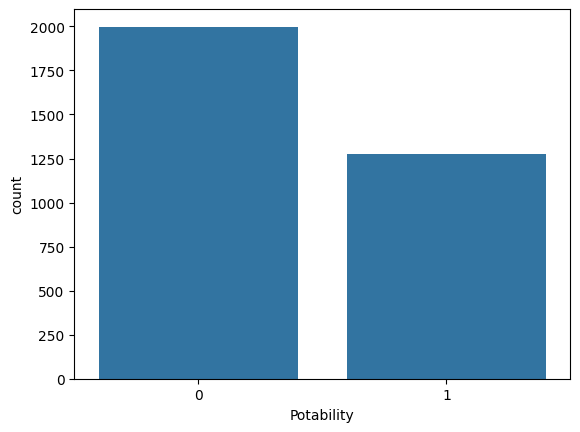

In [14]:
# count plot on single categorical variable
sns.countplot(x ='Potability', data = Input_Data)
 
# Show the plot
plt.show()

<Axes: xlabel='PH'>

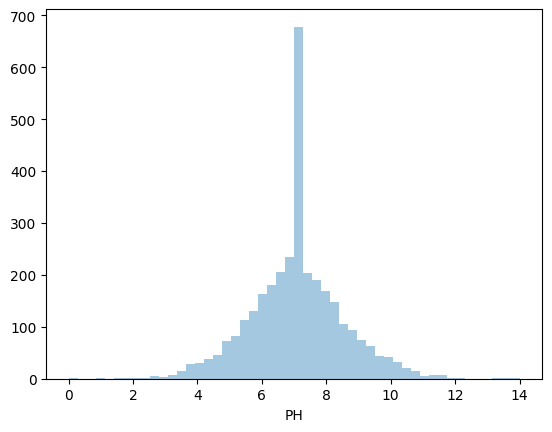

In [15]:
sns.distplot(a=Input_Data['PH'], kde=False)

<Axes: xlabel='Hardness'>

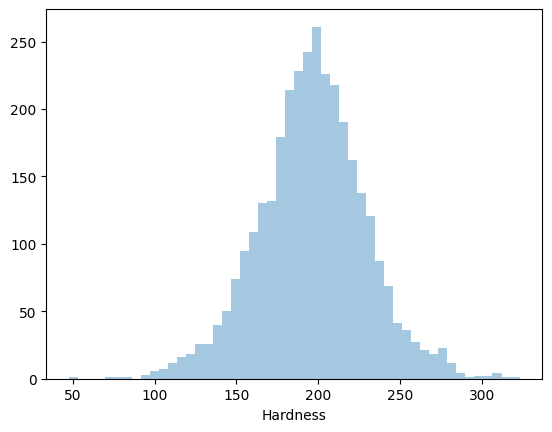

In [16]:
sns.distplot(a=Input_Data['Hardness'], kde=False)

<Axes: xlabel='TDS'>

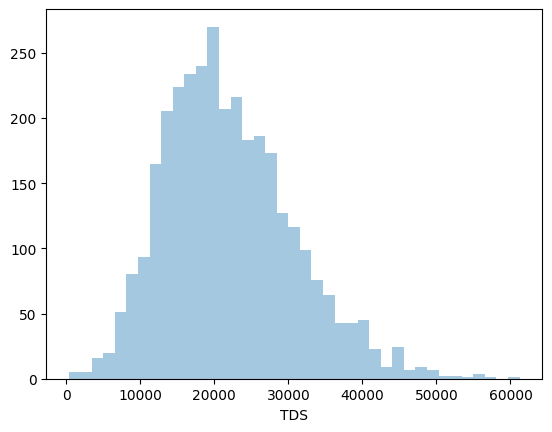

In [17]:
sns.distplot(a=Input_Data['TDS'], kde=False)

<Axes: xlabel='Chloramines'>

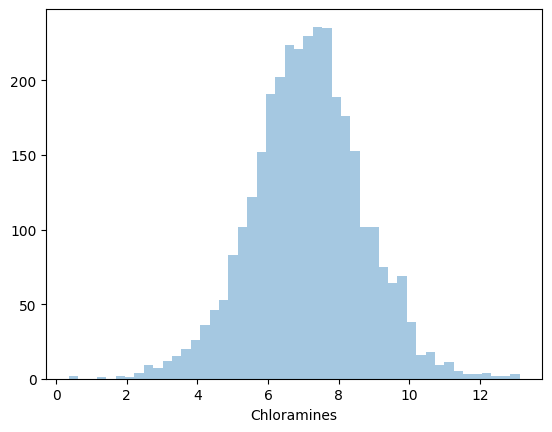

In [18]:
sns.distplot(a=Input_Data['Chloramines'], kde=False)

<Axes: xlabel='Sulfate'>

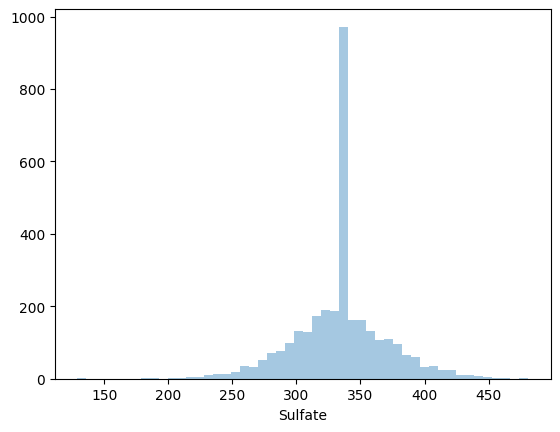

In [19]:
sns.distplot(a=Input_Data['Sulfate'], kde=False)

<Axes: xlabel='Conductivity'>

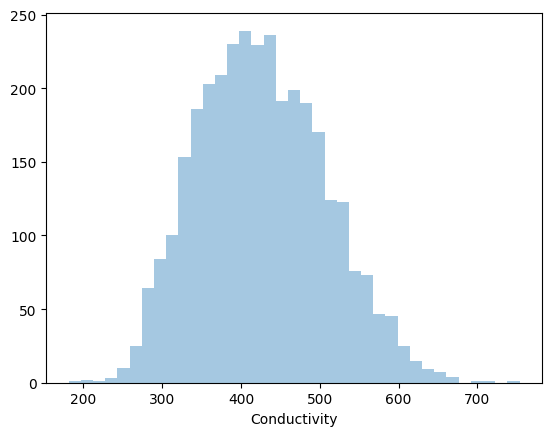

In [20]:
sns.distplot(a=Input_Data['Conductivity'], kde=False)

<Axes: xlabel='Organic_carbon'>

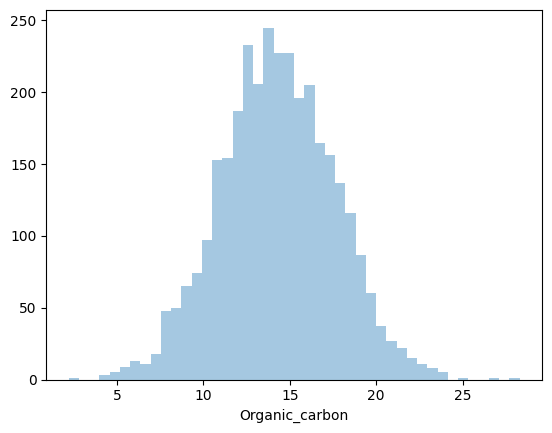

In [21]:
sns.distplot(a=Input_Data['Organic_carbon'], kde=False)

<Axes: xlabel='Turbidity'>

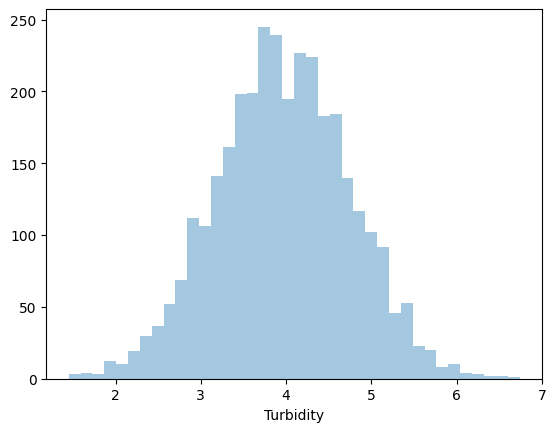

In [22]:
sns.distplot(a=Input_Data['Turbidity'], kde=False)

<Axes: xlabel='PH', ylabel='Density'>

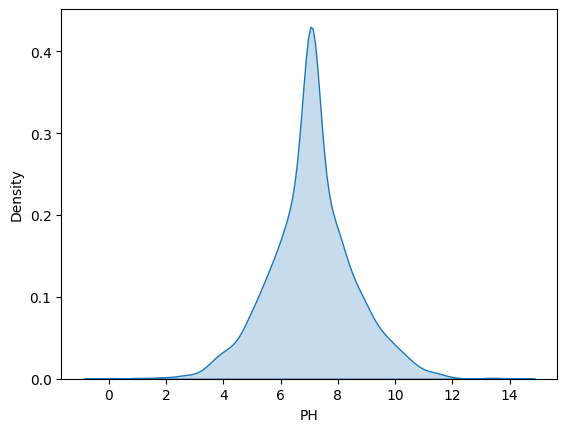

In [23]:
sns.kdeplot(data=Input_Data['PH'], shade=True)

<Axes: xlabel='Hardness', ylabel='Density'>

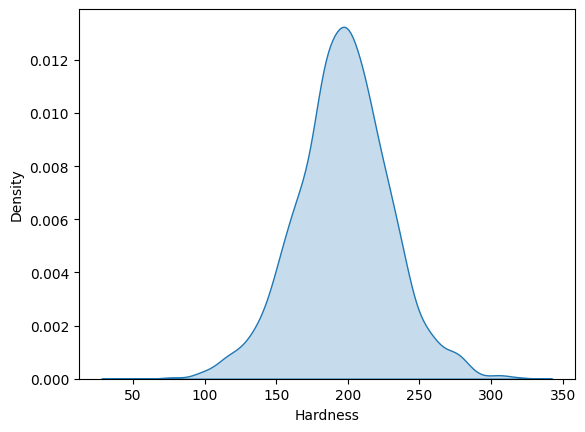

In [24]:
sns.kdeplot(data=Input_Data['Hardness'], shade=True)

<Axes: xlabel='TDS', ylabel='Density'>

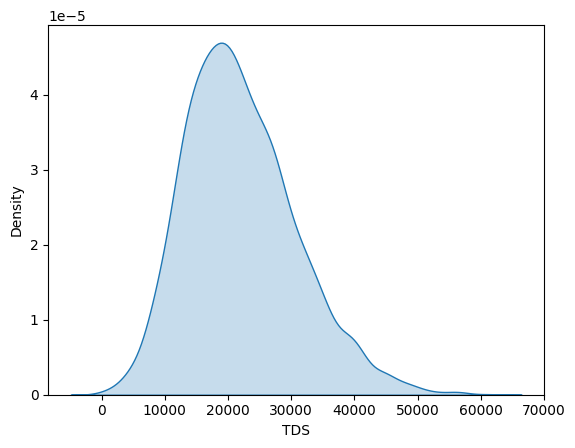

In [25]:
sns.kdeplot(data=Input_Data['TDS'], shade=True)

<Axes: xlabel='Chloramines', ylabel='Density'>

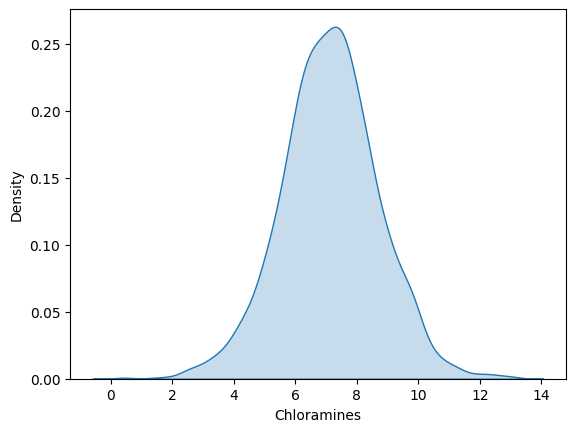

In [26]:
sns.kdeplot(data=Input_Data['Chloramines'], shade=True)

<Axes: xlabel='Sulfate', ylabel='Density'>

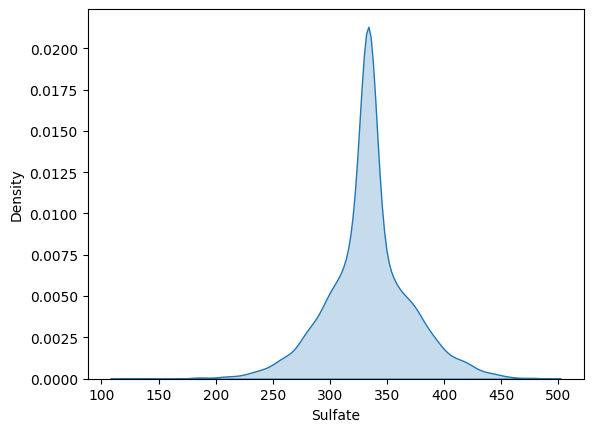

In [27]:
sns.kdeplot(data=Input_Data['Sulfate'], shade=True)

<Axes: xlabel='Conductivity', ylabel='Density'>

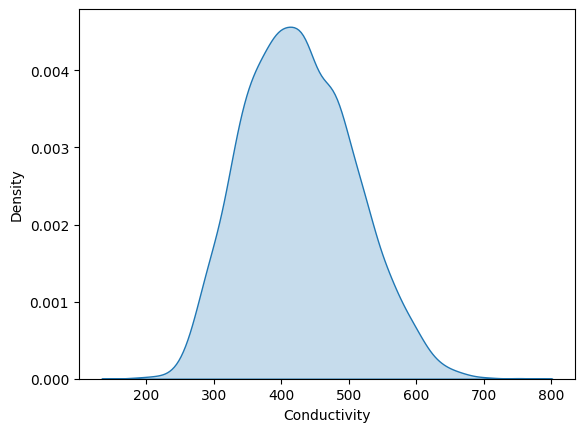

In [28]:
sns.kdeplot(data=Input_Data['Conductivity'], shade=True)

<Axes: xlabel='Organic_carbon', ylabel='Density'>

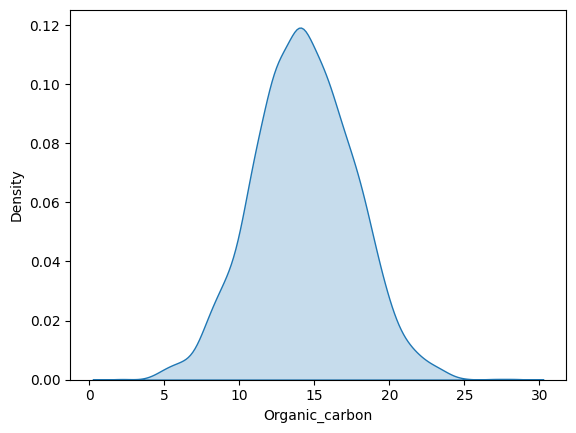

In [29]:
sns.kdeplot(data=Input_Data['Organic_carbon'], shade=True)

<Axes: xlabel='Turbidity', ylabel='Density'>

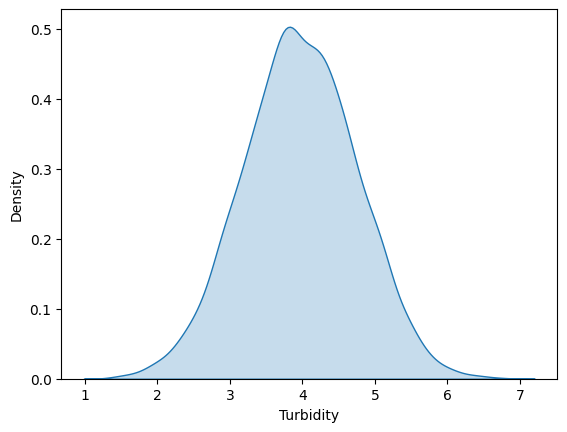

In [30]:
sns.kdeplot(data=Input_Data['Turbidity'], shade=True)

<Axes: xlabel='Sulfate', ylabel='Density'>

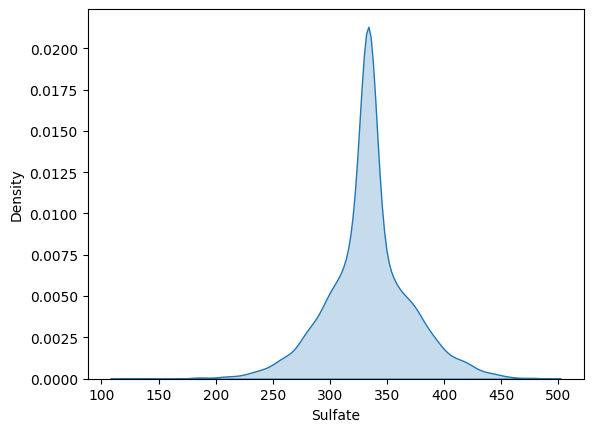

In [31]:
sns.kdeplot(data=Input_Data['Sulfate'], shade=True)

<Axes: xlabel='Conductivity', ylabel='Density'>

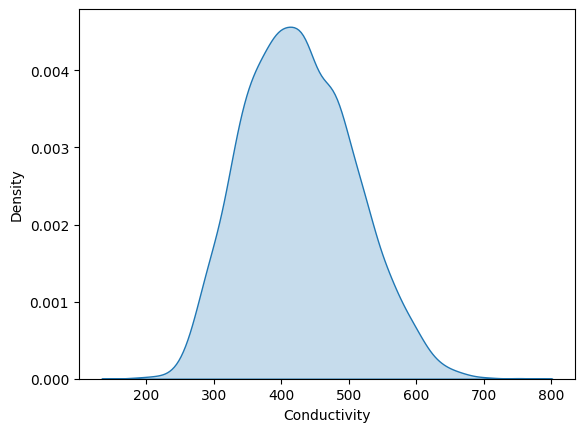

In [32]:
sns.kdeplot(data=Input_Data['Conductivity'], shade=True)

<Axes: >

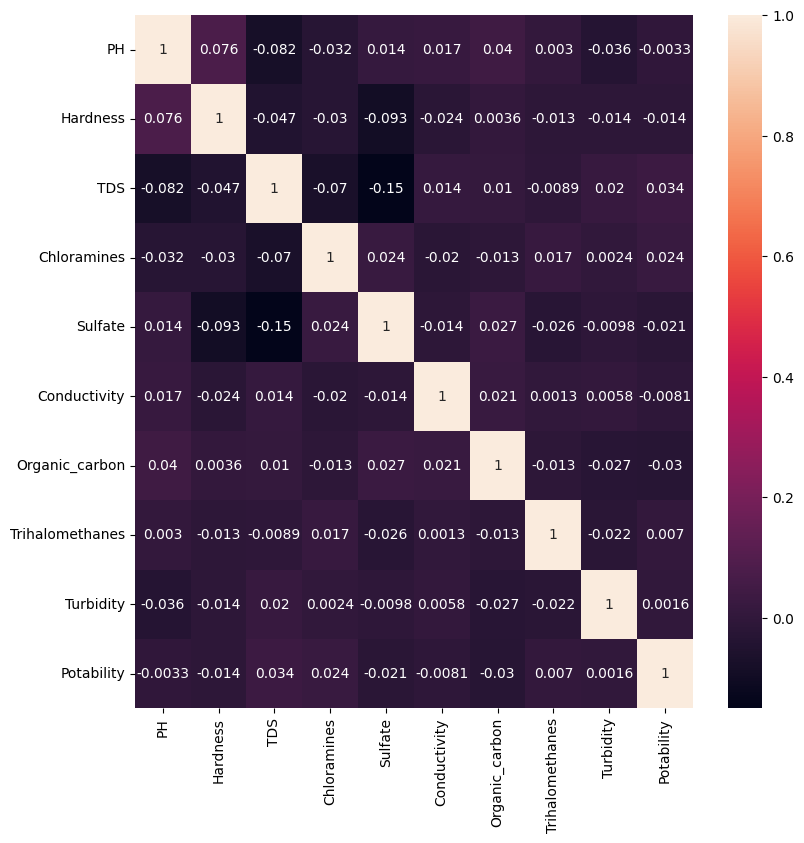

In [33]:
import seaborn as sns
corr = Input_Data.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corr, annot = True)

                PH     Hardness           TDS  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690300     6.127421   317.094638   
50%       7.080795   196.967627  20927.833605     7.130299   333.775777   
75%       7.870050   216.667456  27332.762125     8.114887   350.385756   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  


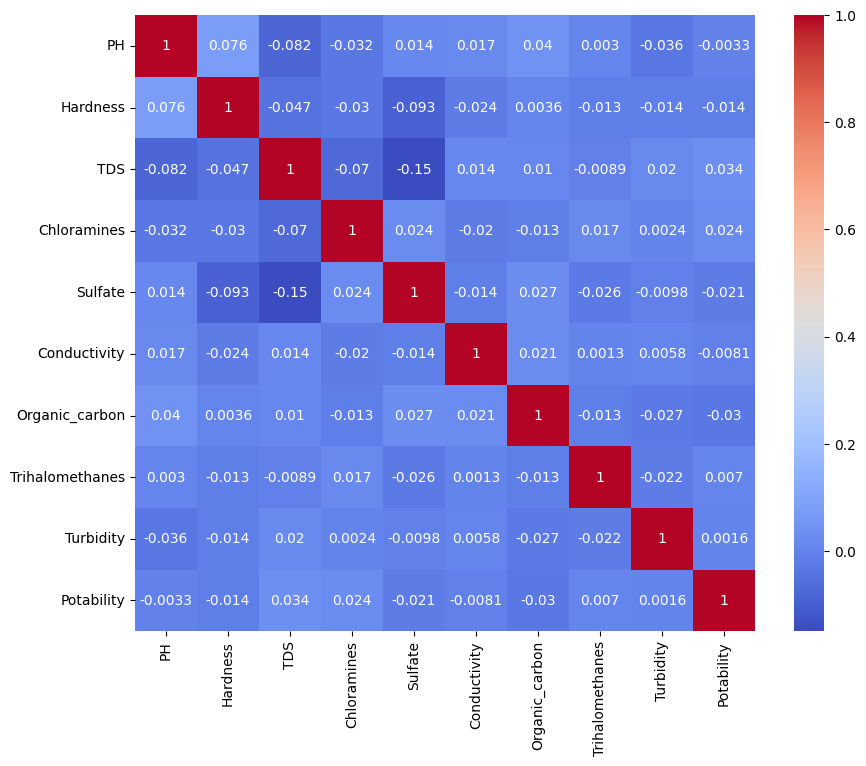

PH                 0
Hardness           0
TDS                0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [34]:
# Summary statistics
print(Input_Data.describe())

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = Input_Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Missing data analysis
missing_data = Input_Data.isna().sum()
print(missing_data)


# Model Implementation : Machine Learning Model

In [35]:
Input = Input_Data.drop('Potability',axis =1)
Input

,PH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [36]:
Output = Input_Data['Potability']
Output

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.2, random_state=0)

# Random Forest Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier_RF = RandomForestClassifier()
classifier_RF = classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)
Accuracy_RF = accuracy_score(y_test,y_pred_RF)
print("Model Accuracy of Random Forest Algorithm:",Accuracy_RF)

Model Accuracy of Random Forest Algorithm: 0.6737804878048781


# Confusion Matrix for Random Forest Algorithm

Confusion Matrix:
[[367  45]
 [169  75]]


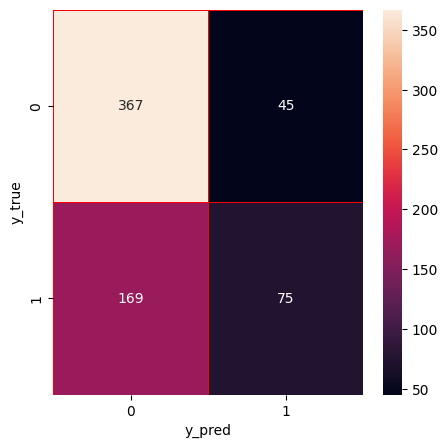

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(result)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(result,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Classification Report for  Random Forest Algorithm

In [40]:
result1 = classification_report(y_test, y_pred_RF)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       412
           1       0.62      0.31      0.41       244

    accuracy                           0.67       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.66      0.67      0.64       656



# Naive Bayes Algorithm

In [41]:
#check for NaN values before fitting model
import numpy as np

# Check for NaN values in X_train and X_test
print("NaN in X_train:", np.isnan(X_train).any())
print("NaN in X_test:", np.isnan(X_test).any())


NaN in X_train: PH                 False
Hardness           False
TDS                False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
dtype: bool
NaN in X_test: PH                 False
Hardness           False
TDS                False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
dtype: bool


In [42]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

imputer = SimpleImputer(strategy='mean')

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the GaussianNB model
NB = GaussianNB()
NB.fit(X_train_imputed, y_train)

# Make predictions
y_pred = NB.predict(X_test_imputed)
# Calculate accuracy
Accuracy_NB = accuracy_score(y_test, y_pred)

# Print accuracy
print(f'Accuracy: {Accuracy_NB:.2f}')


Accuracy: 0.62


# Confusion Matrix for Naive Bayes Algorithm

Confusion Matrix:
[[353  59]
 [193  51]]


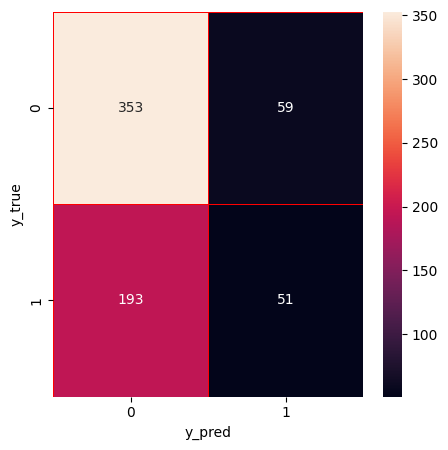

In [43]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm_NB = confusion_matrix(y_test,y_pred )  
print("Confusion Matrix:")
print(cm_NB)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_NB,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Classification Report for Naive Bayes Algorithm

In [44]:
cm_NB = classification_report(y_test, y_pred)
print("Classification Report:",)
print (cm_NB)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       412
           1       0.46      0.21      0.29       244

    accuracy                           0.62       656
   macro avg       0.56      0.53      0.51       656
weighted avg       0.58      0.62      0.57       656



# SUPPORT VECTOR MACHINE ALGORITHM

In [49]:
from sklearn.svm import SVC

# Split the dataset into features (X) and target (y)
X = Input_Data.drop('TDS', axis=1)  # Features
y = Input_Data['Potability']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
Accuracy_SVM = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {Accuracy_SVM}")

SVM Accuracy: 1.0


# CONFUSION MATRIX FOR SVM MODEL

Confusion Matrix for SVM:
[[412   0]
 [  0 244]]


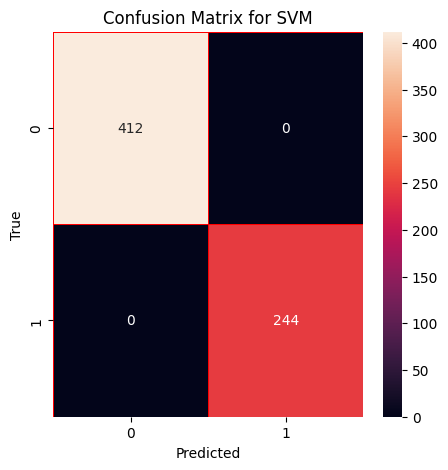

In [ ]:
# Create the confusion matrix
cm_SVM = confusion_matrix(y_test, svm_predictions)

# Print the confusion matrix
print("Confusion Matrix for SVM:")
print(cm_SVM)

# Plotting the confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_SVM, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM")
plt.show()

# Classification report of svm_model

In [ ]:
cm_SVM = classification_report(y_test, y_pred)
print("Classification Report:",)
print (cm_SVM)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       244

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



# Comparison of all the Algorithm

Text(0.5, 1.0, 'Model Accuracy of all the Algorithm')

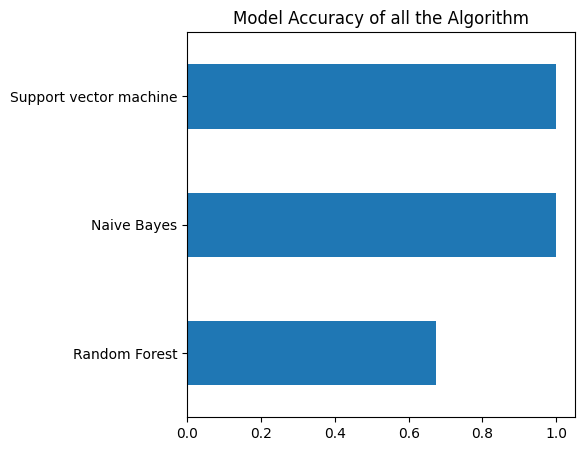

In [ ]:
model_accuracy_knn_lr = pd.Series(data=[Accuracy_RF,Accuracy_NB,Accuracy_SVM], 
                index=['Random Forest','Naive Bayes','Support vector machine'])
fig= plt.figure(figsize=(5,5))
model_accuracy_knn_lr.sort_values().plot.barh()
plt.title('Model Accuracy of all the Algorithm')

# FILTER SUGGESTION 

In [ ]:
# Update the filter recommendation function with more detailed conditions
def recommend_filters_v2(row):
    if row['TDS'] > 41000 or row['PH'] < 6.5 or row['PH'] > 8.5 or row['Conductivity'] > 2000:
        return "Reverse Osmosis"
    elif row['Hardness'] > 250 or row['Sulfate'] > 400:
        return "Ion Exchange"
    elif row['Chloramines'] > 3 or row['Organic_carbon'] > 2:
        return "Activated Carbon"
    elif row['Turbidity'] > 1:
        return "Mechanical"
    elif row['Potability'] == 0:
        return "Ultraviolet (UV)"
    else:
        return "No Filter Needed"

# Apply the function to each row and create a new column 'Suggested_Filter'
Input_Data['Suggested_Filter'] = Input_Data.apply(recommend_filters_v2, axis=1)

# Display the first few rows to verify the new column
Input_Data[['PH', 'Hardness', 'TDS', 'Chloramines', 'Sulfate', 'Conductivity', 'Turbidity', 'Potability', 'Suggested_Filter']].head()





,PH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Turbidity,Potability,Suggested_Filter
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,2.963135,0,Activated Carbon
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,4.500656,0,Reverse Osmosis
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,3.055934,0,Activated Carbon
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,4.628771,0,Activated Carbon
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,4.075075,0,Reverse Osmosis


In [ ]:
# Save the updated DataFrame to a new CSV file
Input_Data.to_csv("C:\\Users\\Rutuja\\OneDrive\\Documents\\TY_Instru\\AI_ML\\AI_ML_CP\\updated_water_potability_final.csv", index=False)